In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [125]:
aus_df = pd.read_csv('data/weatherAUS.csv', sep=';')

/opt/anaconda3/envs/rain_project/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [126]:
print(aus_df.shape)

(145460, 23)


In [127]:
# Check string values in Pressure3pm

lista_strings = aus_df['Pressure3pm'].tolist()
for i, elem in enumerate(lista_strings):
    try:
        lista_strings[i] = float(elem)
    except:
        lista_strings[i] = elem
    
filtered_list = filter(lambda x: type(x) != float, lista_strings)
list(filtered_list)





['1.009.555', '1.016.777']

In [128]:
# Create a function to transform string values into float
def preasure_to_float(elem):
    try:
        return float(elem)
    except:
        pattern = re.compile("(\d*)(\.(\d*))(\.(\d*))")
        if pattern.match(elem):
            elem = re.sub(r'(\d*)(\.(\d*))(\.(\d*))', r'\1\3.\5' , elem)
            return float(elem)


In [129]:
aus_df['Pressure3pm'] = aus_df['Pressure3pm'].apply(lambda x: preasure_to_float(x))

In [130]:
# get categorical data
cat_data = aus_df.select_dtypes(include=['object'])
categorical = cat_data.columns.tolist()

float_data = aus_df.select_dtypes(include=['float64'])
numerical = float_data.columns.tolist()

print("Categorical Features: {}".format(len(categorical)))
print(categorical)

print("Numerical Features: {}".format(len(numerical)))
print(numerical)

Categorical Features: 7
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Features: 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [131]:
print("Unique num values of categoricals:")
for cat_feature in categorical:
   unique_values = len(aus_df[cat_feature].unique())
   print("{} : {}".format(cat_feature, unique_values))


Unique num values of categoricals:
Date : 3436
Location : 49
WindGustDir : 17
WindDir9am : 17
WindDir3pm : 17
RainToday : 3
RainTomorrow : 3


In [132]:
cat_null_df = pd.DataFrame(aus_df[categorical].isnull().sum())
cat_null_df.reset_index(inplace=True)
cat_null_df = cat_null_df.rename(columns = {'index':'Feature', 0:'Nulls'})
cat_null_df.drop(cat_null_df[cat_null_df['Nulls'] == 0].index, inplace = True)
print(cat_null_df)


        Feature  Nulls
2   WindGustDir  10326
3    WindDir9am  10566
4    WindDir3pm   4228
5     RainToday   3261
6  RainTomorrow   3267


In [133]:

num_null_df = pd.DataFrame(aus_df[numerical].isnull().sum())
num_null_df.reset_index(inplace=True)
num_null_df = num_null_df.rename(columns = {'index':'Feature', 0:'Nulls'})
num_null_df.drop(num_null_df[num_null_df['Nulls'] == 0].index, inplace = True)
print(num_null_df)

          Feature  Nulls
0         MinTemp   1485
1         MaxTemp   1261
2        Rainfall   3261
3     Evaporation  62790
4        Sunshine  69835
5   WindGustSpeed  10263
6    WindSpeed9am   1767
7    WindSpeed3pm   3062
8     Humidity9am   2654
9     Humidity3pm   4507
10    Pressure9am  15065
11    Pressure3pm  15028
12       Cloud9am  55888
13       Cloud3pm  59358
14        Temp9am   1767
15        Temp3pm   3609


In [134]:
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [153]:
columns_pairplot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainTomorrow']
print(columns_pairplot)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainTomorrow']


In [155]:

aus_df_g2 = aus_df[columns_pairplot]
aus_df_g2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,No
1,7.4,25.1,0.0,NaN,NaN,44.0,No
2,12.9,25.7,0.0,NaN,NaN,46.0,No
3,9.2,28.0,0.0,NaN,NaN,24.0,No
4,17.5,32.3,1.0,NaN,NaN,41.0,No


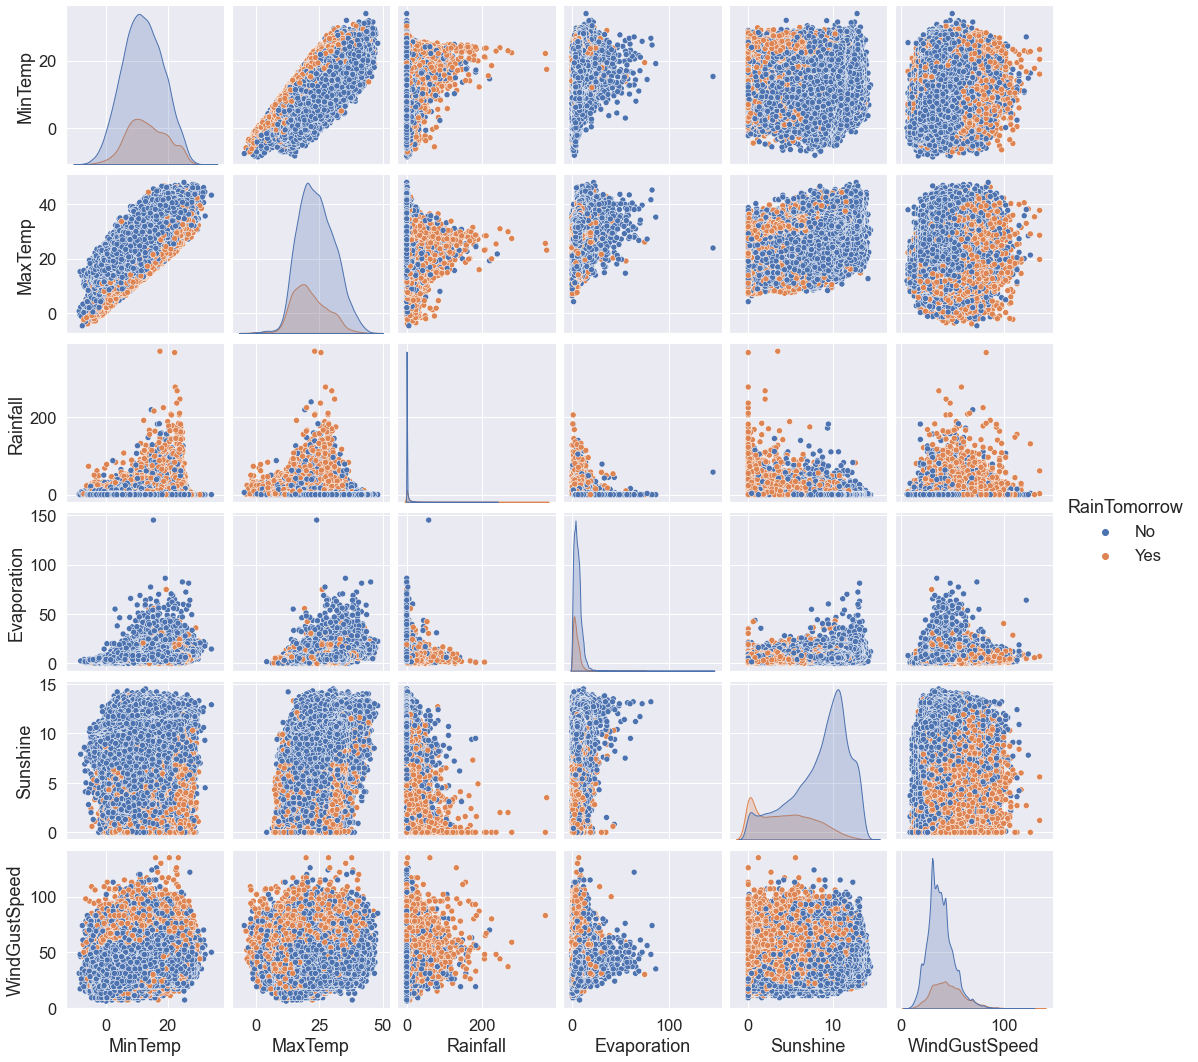

In [156]:
g2 = sns.pairplot(data = aus_df_g2, hue='RainTomorrow')

In [169]:
columns_pairplot_g3 = columns_pairplot[:-1]
print(columns_pairplot_g3)
aus_df_g3 = aus_df[columns_pairplot_g3]
aus_df_g3.head()

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
0,13.4,22.9,0.6,NaN,NaN,44.0
1,7.4,25.1,0.0,NaN,NaN,44.0
2,12.9,25.7,0.0,NaN,NaN,46.0
3,9.2,28.0,0.0,NaN,NaN,24.0
4,17.5,32.3,1.0,NaN,NaN,41.0


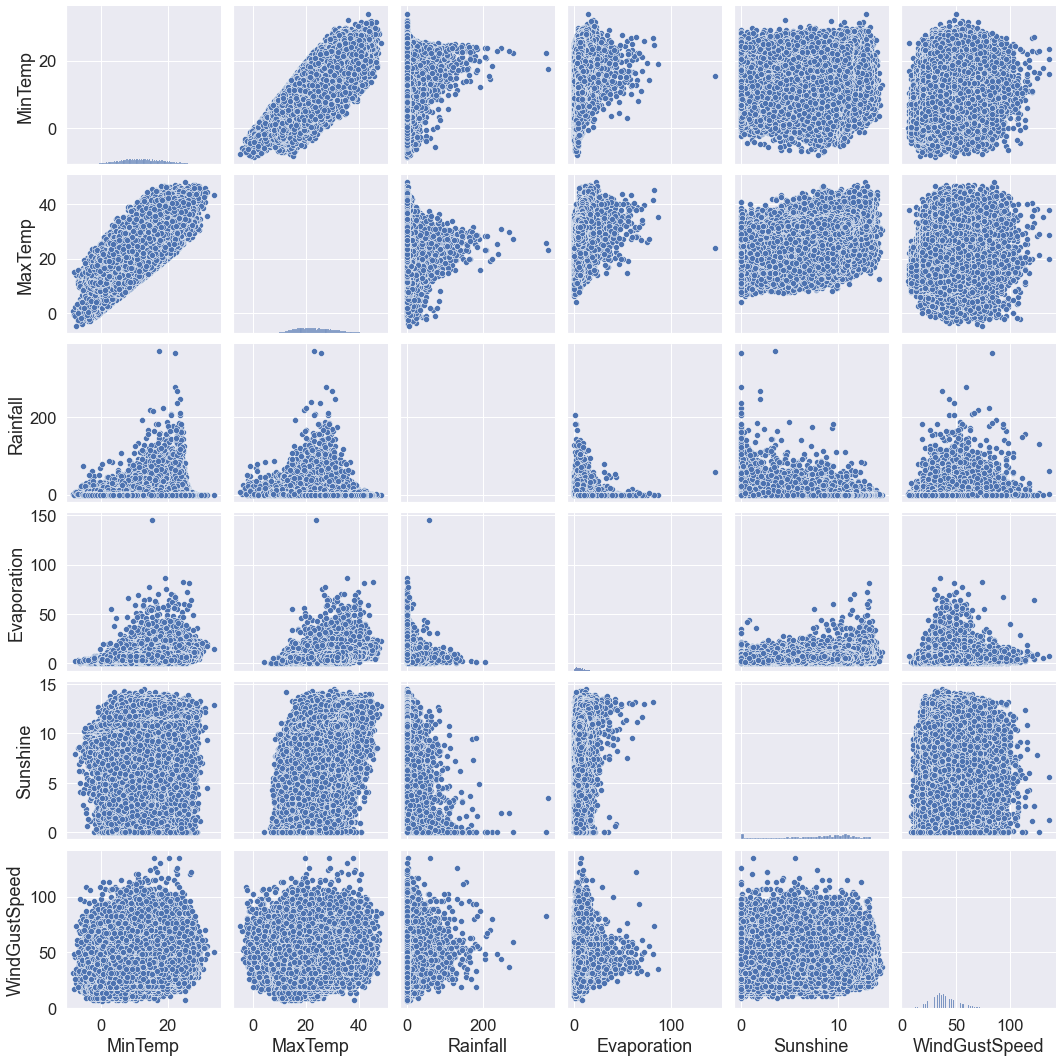

In [158]:
g3 = sns.pairplot(data = aus_df_g3)

<AxesSubplot:>

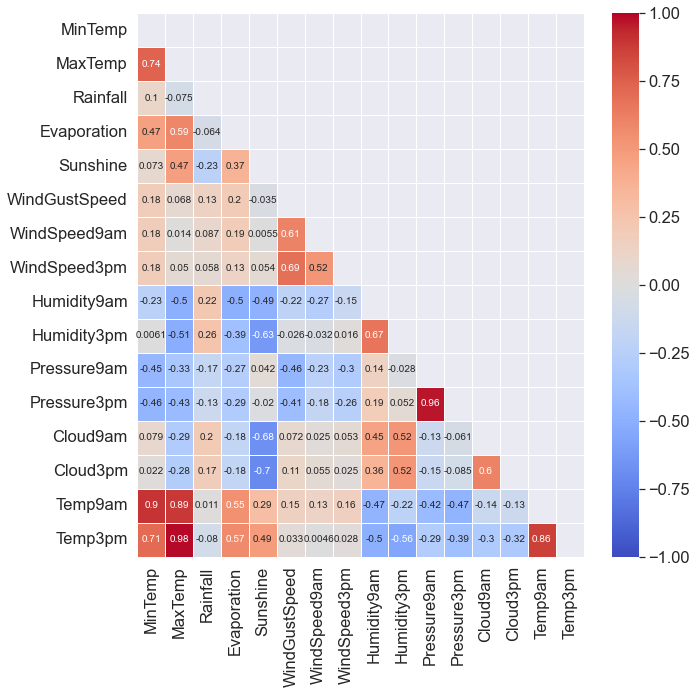

In [167]:
plt.figure(figsize=(10,10))
upp_mat = np.triu(aus_df.corr())
sns.heatmap(aus_df.corr(), linewidths=0.5, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

In [163]:
correlations = aus_df.corr()

In [164]:
correlations

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841
